# Normal Equation

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

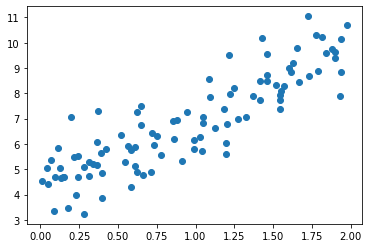

In [17]:
np.random.seed(42)
x = 2* np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)
fig, ax = plt.subplots()
ax.scatter(x, y)

In [28]:
x_b = np.c_[np.ones((100, 1)), x]
weights = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [8]:
weights

array([[4.21509616],
       [2.77011339]])

In [9]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(weights)
y_predict

array([[4.21509616],
       [9.75532293]])

<function matplotlib.pyplot.show(close=None, block=None)>

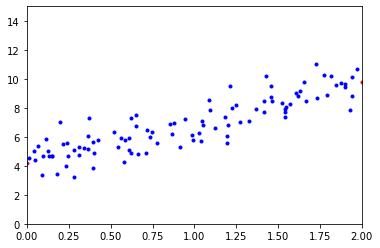

In [10]:
plt.plot(x_new, y_predict, "r.")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show

In [11]:
# try out
np.random.seed(42)
x = 4 * np.random.rand(100, 1)
y = 5 + 3 * x + np.random.randn(100, 1)
x_feed = np.c_[np.ones((100, 1)), x]
weights = np.linalg.inv(x_feed.T.dot(x_feed)).dot(x_feed.T).dot(y)
weights

array([[5.21509616],
       [2.88505669]])

In [12]:
# Faster method Using Psuedoinverses
np.linalg.pinv(x_feed).dot(y)

array([[5.21509616],
       [2.88505669]])

# Gradient Descent

In [13]:
# Batch Gradient Descent
np.random.seed(42)
x = 2* np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)
x_b = np.c_[np.ones((100, 1)), x]

eta = 0.1 # the learning rate
n_iterations = 1000
n = 100
theta = np.random.randn(2,1) # random initialisation

for iteration in range(n_iterations):
    gradients = 2/len(x) * x_b.T.dot(x_b.dot(theta)-y)
    theta = theta - eta * gradients
theta

array([[4.21509616],
       [2.77011339]])

In [14]:
# Try out 
x_new = 7 * np.random.rand(1000, 1)
y_new = 35 + 16 * x_new + np.random.randn(1000, 1) 
x_b_try = np.c_[np.ones((1000, 1)), x_new]

eta = 0.05
n_iterations = 10000
n = 1000
theta = np.random.randn(2, 1) # random initialisation

for iteration in range(n_iterations):
    gradients = 2/len(x_new) * x_b_try.T.dot(x_b_try.dot(theta) - y_new)
    theta = theta - eta * gradients
theta

array([[34.98768471],
       [16.02157063]])

## Practice

In [15]:
# load the dataset
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
transformer = OrdinalEncoder()
data = pd.read_csv('data/car sales.csv')
x = data.drop(['Price'], axis=1)
x[['Make', 'Colour']] = transformer.fit_transform(x[['Make', 'Colour']])
y = data['Price']
x_b = np.c_[np.ones((len(x), 1)), x]
weights = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
weights_2 = np.linalg.pinv(x_b).dot(y)
predictions_1 = x_b.dot(weights)
predictions_2 = x_b.dot(weights_2)
# fig, ax = plt.subplots(nrows=1, ncols=2)
# ax[0].scatter(x, y)
# ax[1].plot(x, predictions)
mean = mean_squared_error(y, predictions_1)
print(mean)

55187938.420530275


# Stochastic Gradient Descent

In [47]:
epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learningSchedule(t):
    return t0 /(t + t1)

theta = np.random.randn(2,1) # random initialisation

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learningSchedule(epoch * m + i)
        theta = theta-eta*gradient
theta


array([[4.20797596],
       [2.76455822]])

array([[4.23910469],
       [2.76980429]])

In [42]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21370643]), array([2.78518429]))

In [49]:
x_try = np.random.rand(1000, 1)
y = 34 + 76*x_try
x_b_try = np.c_[np.ones((len(x_try), 1)), x_try]

epochs = 500
t0, t1 = 50, 500

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)
m = len(x)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b_try[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
theta

array([[34.],
       [76.]])

In [5]:
x_try = np.random.rand(1000, 1)
y_try = 45 + 26 * x_try
x_b_try = np.c_[np.ones((1000, 1)), x_try]

n_epochs = 500
t0, t1 = 50, 500

def learning_schedule(t):
    return t0/(t1+t)

theta = np.random.randn(2,1)

m = len(x_try)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b_try[random_index: random_index+1]
        yi = y_try[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
theta


array([[45.],
       [26.]])

In [6]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x_try, y_try.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([44.99954985]), array([26.00077535]))

# Polynomial Regression

In [3]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)
x_b_try = np.c_[np.ones((100,1), x)]


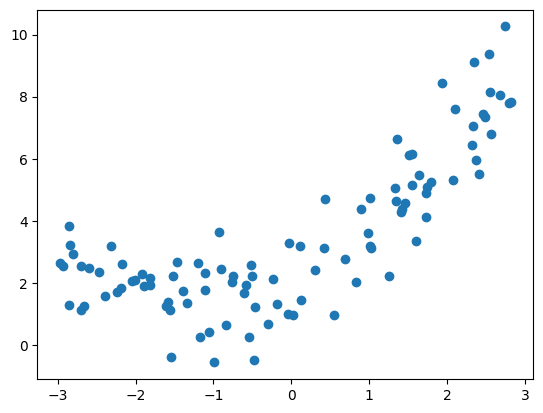

In [9]:
# adding features instead of making a polynomial model
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
# process the values in a linear regression model
n_epoch = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t1+t)

theta = np.random.randn(2, 1)

for epoch in range(n_epoch):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_poly[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + 1)
        theta = theta - eta * gradients
predictions = x_poly.dot(theta)

fig, ax = plt.subplots()
ax.scatter(x, y)


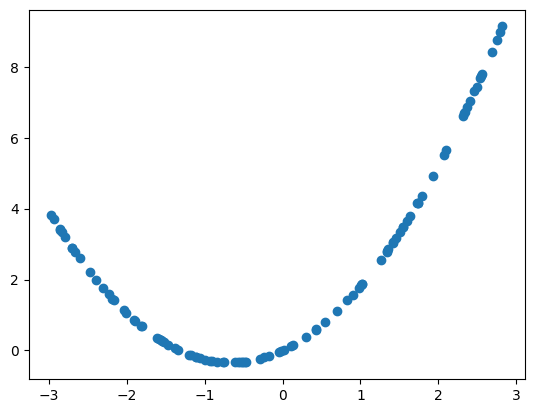

In [10]:
fig, ax = plt.subplots()
ax.scatter(x, predictions)